# Installing packages and loading data

In [580]:
import IPython.display
import os

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile
import torch
import torchaudio

In [581]:
labeled_files = pd.read_csv("train_gt (1).csv")

# EDA

## Melspectograms of defected and non-defected speech


In [582]:
N_SAMPLES = 1

In [599]:
#defected_files = labeled_files[labeled_files["Label"] == 1].sample(N_SAMPLES)
no_defects_files = labeled_files[labeled_files["Label"] == 0].sample(N_SAMPLES)

### Finding target sound

In [596]:
defected_audio, defected_audio_sr = librosa.load(os.path.join("train", defected_files.iloc[0][0]))
l, r = 0.8, 0.9 # 0, len(defected_audio) / defected_audio_sr
print(f"listeting from {l}s to {r}s")
IPython.display.Audio(defected_audio[round(l * defected_audio_sr):round(r * defected_audio_sr)], rate=defected_audio_sr)

listeting from 0.8s to 0.9s


/var/folders/5n/f3whpppj2sjg329tk1md_zq80000gn/T/ipykernel_10439/162301967.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  defected_audio, defected_audio_sr = librosa.load(os.path.join("train", defected_files.iloc[0][0]))


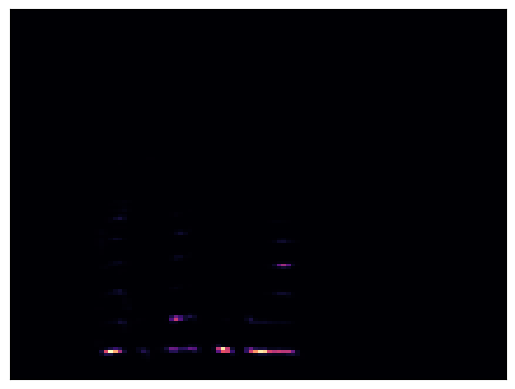

In [597]:
defected_mel = librosa.feature.melspectrogram(y=defected_audio, sr = defected_audio_sr)
defected_mel_db = librosa.power_to_db(np.abs(defected_mel), ref = np.max)
librosa.display.specshow(defected_mel)
soundfile.write("melspectograms/positives/" + input() + ".wav", defected_audio[round(l * defected_audio_sr):round(r * defected_audio_sr)], defected_audio_sr)

In [609]:
no_defects_audio, no_defects_audio_sr = librosa.load(os.path.join("train", no_defects_files.iloc[0][0]))
l, r = 2.65, 2.75
print(f"listeting from {l * no_defects_audio_sr}s to {r * no_defects_audio_sr}s")
IPython.display.Audio(no_defects_audio[round(l * no_defects_audio_sr):round(r * no_defects_audio_sr)], rate=no_defects_audio_sr)

listeting from 58432.5s to 60637.5s


/var/folders/5n/f3whpppj2sjg329tk1md_zq80000gn/T/ipykernel_10439/2234361150.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_defects_audio, no_defects_audio_sr = librosa.load(os.path.join("train", no_defects_files.iloc[0][0]))


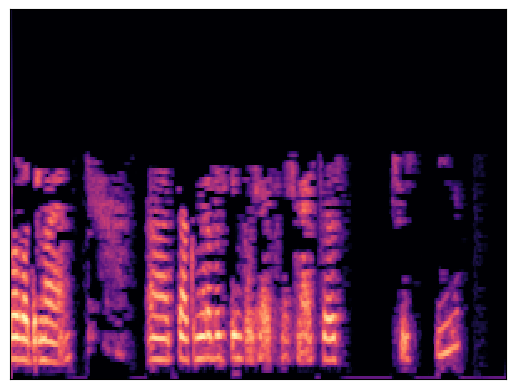

In [610]:
no_defects_mel = librosa.feature.melspectrogram(y=no_defects_audio)
no_defects_mel_db = librosa.power_to_db(np.abs(no_defects_mel), ref = np.max)
librosa.display.specshow(no_defects_mel_db)
soundfile.write("melspectograms/negatives/" + input() + ".wav", no_defects_audio[round(l * no_defects_audio_sr):round(r * no_defects_audio_sr)], no_defects_audio_sr)